In [1]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv("../data/fitness_gym.csv")

# Converter a coluna de data para formato datetime
df["date"] = pd.to_datetime(df["date"])

# Conferir a estrutura do DataFrame
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   check_in_id          200 non-null    object        
 1   date                 200 non-null    datetime64[ns]
 2   time                 200 non-null    object        
 3   member_id            200 non-null    object        
 4   age                  200 non-null    int64         
 5   gender               200 non-null    object        
 6   membership_type      200 non-null    object        
 7   activity             200 non-null    object        
 8   duration_minutes     200 non-null    int64         
 9   calories_burned      200 non-null    int64         
 10  activity_category    200 non-null    object        
 11  attendance_streak    200 non-null    int64         
 12  satisfaction_score   200 non-null    int64         
 13  cancelled            200 non-null  

,check_in_id,date,time,member_id,age,gender,membership_type,activity,duration_minutes,calories_burned,activity_category,attendance_streak,satisfaction_score,cancelled,cancellation_reason
0,CHECK_0001,2023-01-01,07:16:00,MEMBER_0054,56,F,Basic,Yoga,50,162,Bem-estar,5,4,False,NaN
1,CHECK_0002,2023-01-02,18:47:00,MEMBER_0021,18,F,Premium,CrossFit,64,633,Funcional,22,5,False,NaN
2,CHECK_0003,2023-01-04,07:54:00,MEMBER_0072,36,M,Premium,Musculação,73,417,Força,16,5,False,NaN
3,CHECK_0004,2023-01-08,12:10:00,MEMBER_0016,19,F,Basic,Jump,41,360,Cardio,11,4,False,NaN
4,CHECK_0005,2023-01-12,08:14:00,MEMBER_0059,26,M,Basic,Musculação,81,462,Força,9,5,False,NaN


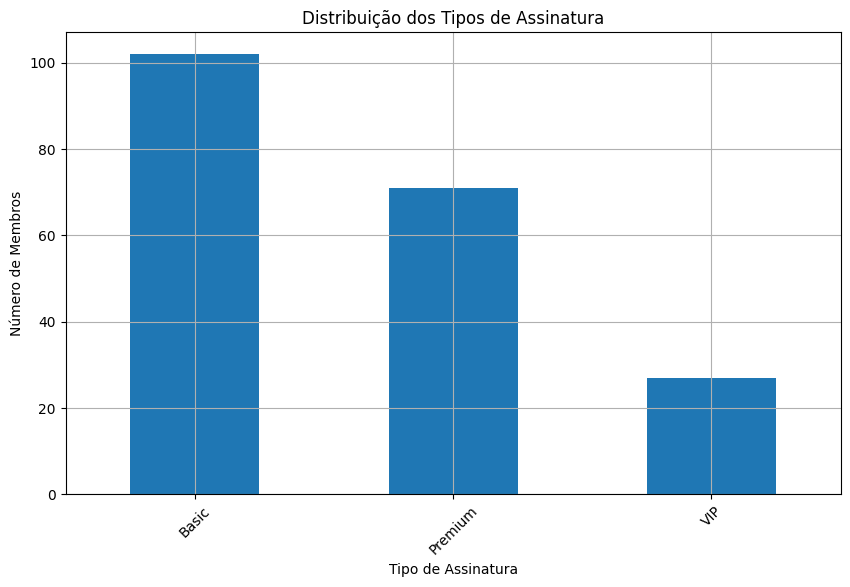

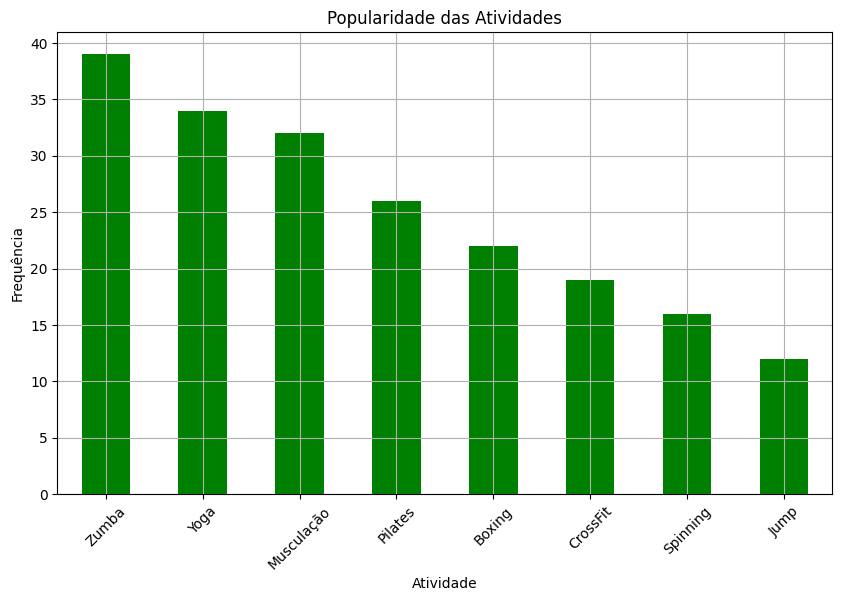

In [2]:
import matplotlib.pyplot as plt

# Comparação de tipos de assinatura
membership_counts = df[
  "membership_type"
].value_counts()

plt.figure(figsize=(10, 6))
membership_counts.plot(kind="bar")
plt.title("Distribuição dos Tipos de Assinatura")
plt.xlabel("Tipo de Assinatura")
plt.ylabel("Número de Membros")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Comparação de atividades populares
activity_counts = df["activity"].value_counts()

plt.figure(figsize=(10, 6))
activity_counts.plot(kind="bar", color="green")
plt.title("Popularidade das Atividades")
plt.xlabel("Atividade")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

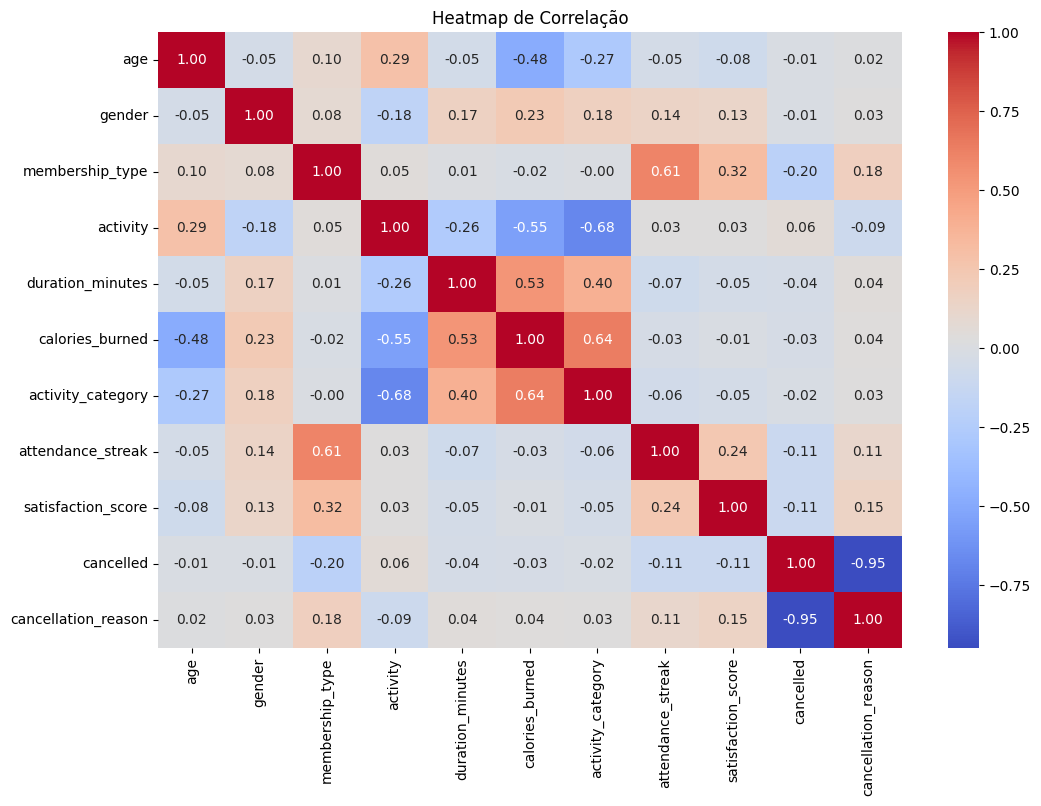

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Excluir colunas não relevantes para a correlação
df = df.drop(
  ["check_in_id", "member_id", "date", "time"],
  axis=1,
)  # Exclui identificadores e datas

# Aplicar LabelEncoder para colunas categóricas
label_encoder = LabelEncoder()
categorical_columns = [
  "gender",
  "membership_type",
  "activity",
  "activity_category",
  "cancellation_reason"
]  # ajuste conforme suas colunas
for col in categorical_columns:
  df[col] = label_encoder.fit_transform(df[col])

# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Heatmap de correlações
plt.figure(figsize=(12, 8))
sns.heatmap(
  correlation_matrix,
  annot=True,
  fmt=".2f",
  cmap="coolwarm",
)
plt.title("Heatmap de Correlação")
plt.show()

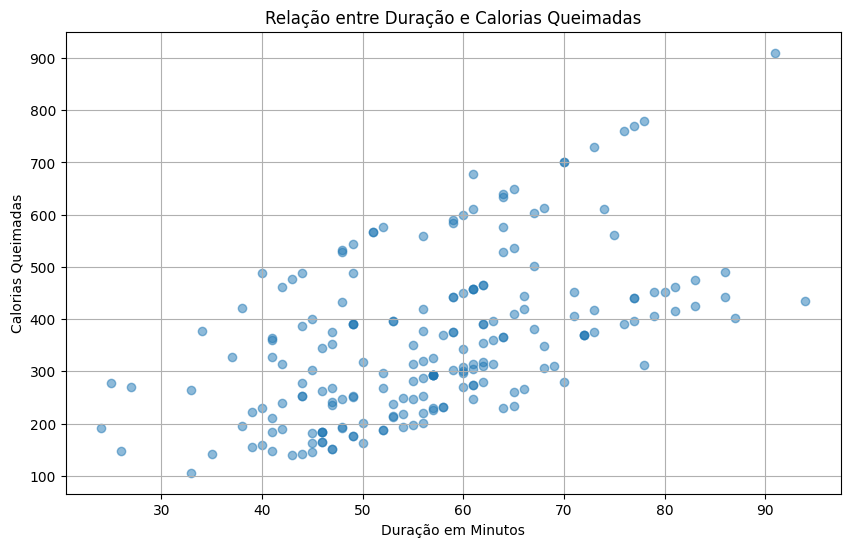

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(
  df["duration_minutes"],
  df["calories_burned"],
  alpha=0.5,
)
plt.title(
  "Relação entre Duração e Calorias Queimadas"
)
plt.xlabel("Duração em Minutos")
plt.ylabel("Calorias Queimadas")
plt.grid(True)
plt.show()

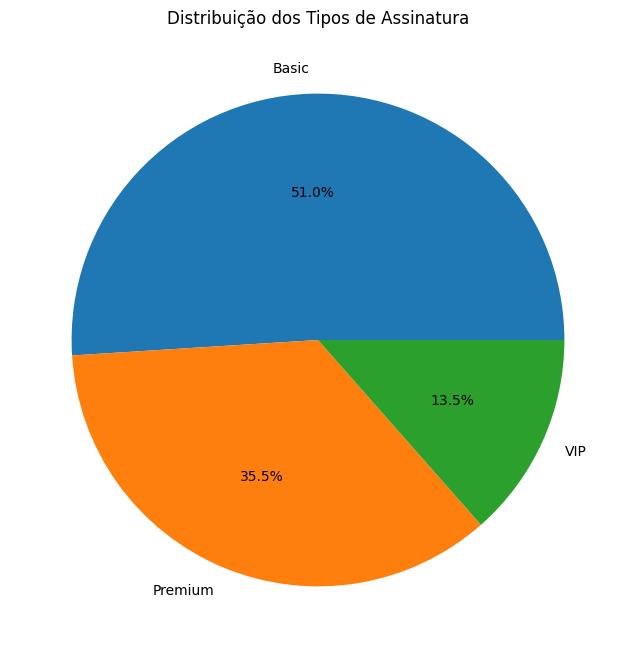

In [5]:
plt.figure(figsize=(8, 8))
membership_counts.plot(
  kind="pie", autopct="%1.1f%%"
)
plt.title("Distribuição dos Tipos de Assinatura")
plt.ylabel("")  # Remover o rótulo do eixo y
plt.show()